# Importing matplotlib and numpy

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Creating a simple range

In [3]:
x = np.arange(-5, 5, 0.01)

# Plotting using a numpy function

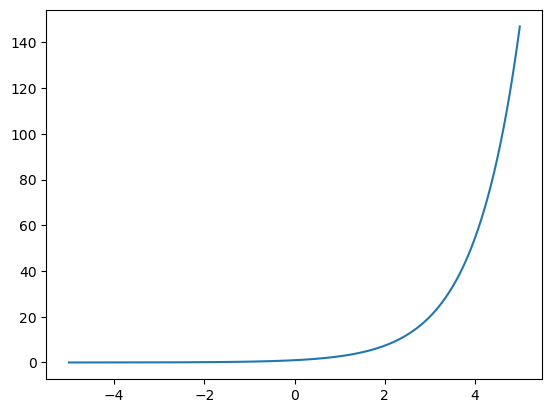

In [5]:
plt.plot(x, np.exp(x))

# Plotting multiple plots in a single figure

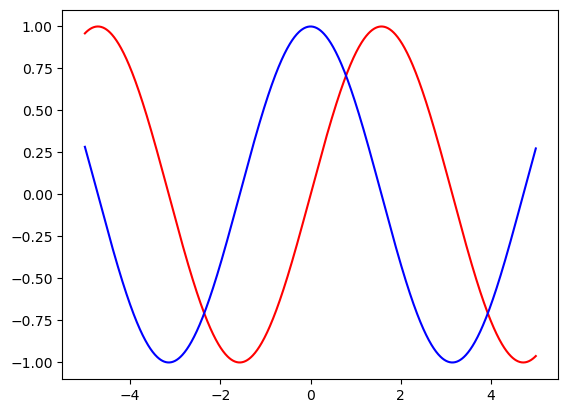

In [6]:
plt.plot(x, np.sin(x), color="red")
plt.plot(x, np.cos(x), color="blue")

# Separating axes from plot

## First, some nice adjustments...

In [203]:
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

## and now back to plotting

In [207]:
x = np.linspace(-10, 10, 10000)

In [208]:
def Gauss(x, m, s, A):
    return A*np.exp(-(x-m)**2/s**2)

def norm_Gauss(x, m, s):
    return Gauss(x, m, s, A=1.0/(s*np.sqrt(2*np.pi)))

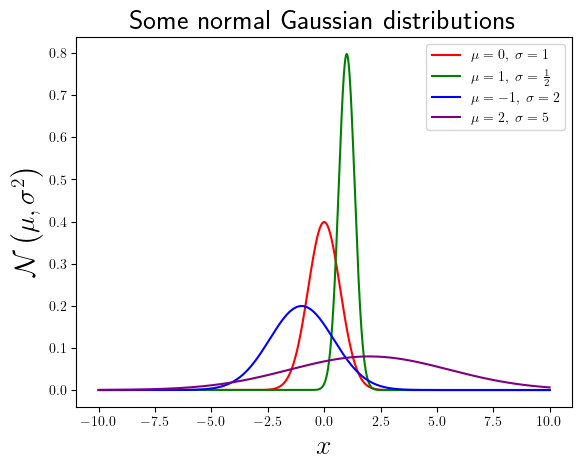

In [209]:
fig, ax = plt.subplots()
ax.plot(x, norm_Gauss(x, 0, 1), color="red", label=r"$\mu=0,\ \sigma=1$")
ax.plot(x, norm_Gauss(x, 1, 0.5), color="green", label=r"$\mu=1,\ \sigma=\frac{1}{2}$")
ax.plot(x, norm_Gauss(x, -1, 2), color="blue", label=r"$\mu=-1,\ \sigma=2$")
ax.plot(x, norm_Gauss(x, 2, 5), color="purple", label=r"$\mu=2,\ \sigma=5$")
ax.set_title(r"Some normal Gaussian distributions")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\mathcal{N}\left(\mu, \sigma^{2}\right)$")
ax.legend()

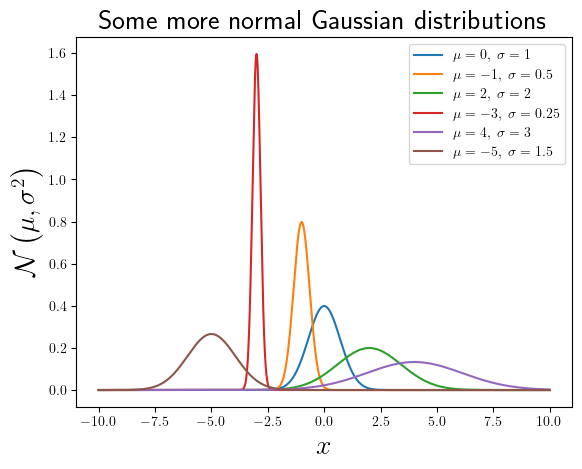

In [210]:
fig, ax = plt.subplots()

ms = [0, -1, 2, -3, 4, -5]
sgs = [1, 0.5, 2, 0.25, 3, 1.5]
for mu, sigma in zip(ms, sgs):
    ax.plot(x, norm_Gauss(x, mu, sigma), label=rf"$\mu={mu},\ \sigma={sigma}$")
    
ax.set_title(r"Some more normal Gaussian distributions")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\mathcal{N}\left(\mu, \sigma^{2}\right)$")
ax.legend()

# Other types of plots

## Bar plots

In [211]:
rand_nums = np.random.normal(175, 25, 5000)
hist, bins = np.histogram(rand_nums, bins=25, density=True)

In [212]:
# for fitting to a Gaussian
from scipy.stats import norm
mu, sigma = norm.fit(rand_nums)
print(mu, sigma)
x = np.arange(min(rand_nums), max(rand_nums), 0.01)

175.2752941296518 24.918417569950357


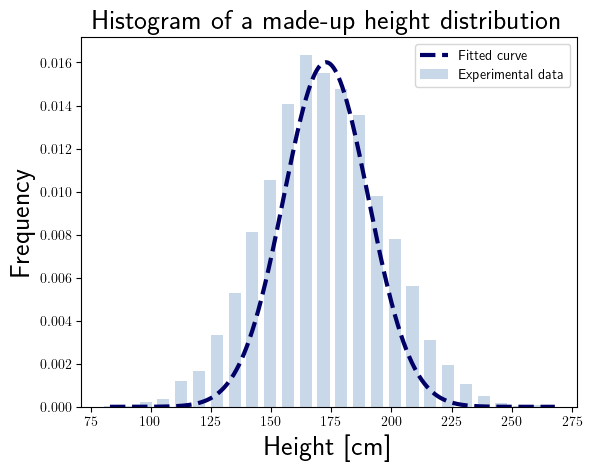

In [242]:
fig, ax = plt.subplots()
W = 5
ax.bar(bins[:-1], hist, width=W, color="#5b8cbe55", label="Experimental data")
ax.plot(x, norm_Gauss(x, mu-W/2, sigma), linewidth=3, color="#000066ff", linestyle="--", label="Fitted curve")
ax.set_title("Histogram of a made-up height distribution")
ax.set_xlabel("Height [cm]")
ax.set_ylabel("Frequency")
ax.legend()

## Scatter plots

In [239]:
rand_pts = np.random.uniform(low=(-5,-5, 0), high=(5, 5, 2), size=(30, 3))
print(rand_pts[:5])

[[ 1.94000776  1.51775261  0.24972827]
 [-1.31076551  4.73426849  1.13881703]
 [-3.57243178  1.49948368  0.16098354]
 [-2.96279042 -1.63551865  1.8217807 ]
 [-2.51668061 -1.4139186   1.72230422]]


Text(0.9400077601623185, -0.48224739151440144, 'Look at this point!')

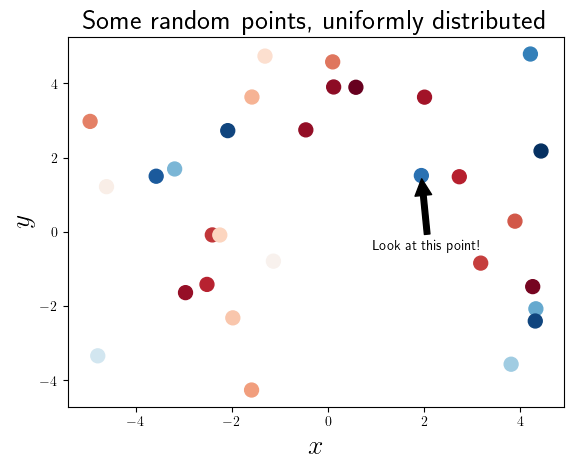

In [240]:
fig, ax = plt.subplots()
ax.scatter(rand_pts[:,0], rand_pts[:,1], s=100, c=rand_pts[:,2], cmap='RdBu_r')
ax.set_title("Some random points, uniformly distributed")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.annotate('Look at this point!', xy=rand_pts[0,:2], xytext=rand_pts[0,:2]+np.array([-1,-2]),
            arrowprops=dict(facecolor='black', lw=1, shrink=0.05))

## Other 2D plots

### From a function

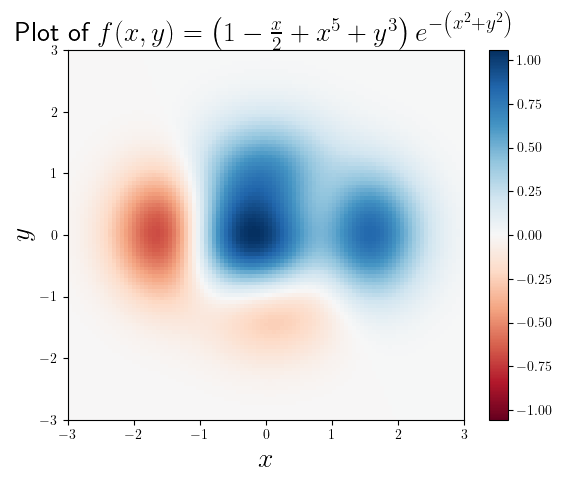

In [272]:
# NOTE: taken from the official matplotlib tutorial

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

# the function z=f(x,y) itself
z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap="RdBu", vmin=z_min, vmax=z_max)
ax.set_title(r"Plot of $f(x,y)=\left(1-\frac{x}{2}+x^{5}+y^{3}\right)e^{-\left(x^{2}+y^{2}\right)}$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

### Heat map (from data)

Text(0.5, 1.0, 'A heat map from a matrix')

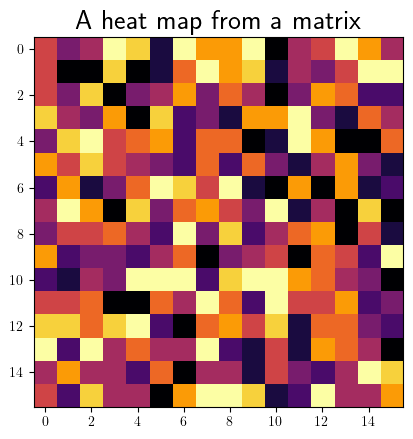

In [290]:
a = np.random.randint(0, 10, size=(16, 16))
fig, ax = plt.subplots()
ax.imshow(a, cmap="inferno", interpolation="nearest")
ax.set_title("A heat map from a matrix")

# Multiple plots in the same figure

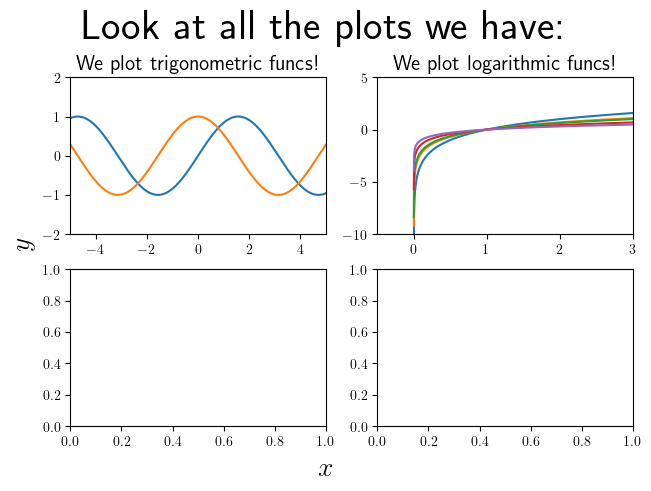

In [309]:
# ----- Global params ----- #

fig, axs = plt.subplots(2, 2, layout="constrained")
fig.suptitle("Look at all the plots we have:", fontsize=30)
fig.supxlabel("$x$", fontsize=20)
fig.supylabel("$y$", fontsize=20)

# ----- Subfig 0,0 ----- #

axs[0, 0].set_title("We plot trigonometric funcs!", fontsize=15)
axs[0, 0].set_xlim([-5, 5])
axs[0, 0].set_ylim([-2, 2])
x00 = np.linspace(-5, 5, 1000)
sin00 = np.sin(x00)
cos00 = np.cos(x00)
for y00 in [sin00, cos00]:
    axs[0, 0].plot(x00, y00)
    
# ----- Subfig 0,1 ----- #

axs[0, 1].set_title("We plot logarithmic funcs!", fontsize=15)
axs[0, 1].set_xlim([-0.5, 3])
axs[0, 1].set_ylim([-10, 5])
x01 = np.linspace(0.0001, 3, 1000)
bases = [2, np.e, 3, 5, 10]
logs01 = [ np.emath.logn(b, x01) for b in bases ]
for lp in logs01:
    axs[0, 1].plot(x01, lp)

# Animation